# Hi, This is Frank's notebook 

In [50]:
import numpy as np
from matplotlib import pyplot as plt

import datetime

import pandas as pd

## Let's do some data cleaning and ploting

In [127]:
file = '../sunspot_data/NOAA_daily_1945.txt'

data = pd.read_table(file, header=1, delim_whitespace=True)
data

,Year,Month,Day,SSN
0,1945,1,1,10.0
1,1945,1,2,0.0
2,1945,1,3,1.0
3,1945,1,4,2.0
4,1945,1,5,11.0
...,...,...,...,...
26658,2017,12,27,NaN
26659,2017,12,28,NaN
26660,2017,12,29,NaN
26661,2017,12,30,NaN


In [128]:
fmt = '%Y.%m.%d'

times = []

for index, row in data.iloc[:].iterrows():
    s = '%i.%i.%i'%(row['Year'],row['Month'],row['Day'])
    dt = datetime.datetime.strptime(s, fmt)
    times.append(dt)


In [129]:
t = Time(times,)

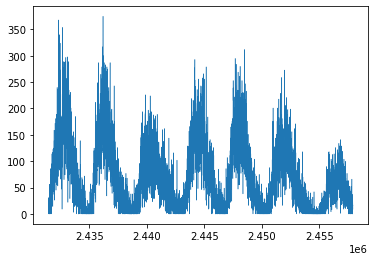

In [130]:
plt.plot(t.jd, data['SSN'], lw=0.5)

In [131]:
stacked = np.vstack((t.jd,data['SSN']))

np.savetxt('NOAA_daily_inJD.txt',stacked.T, fmt='%1.1f',header='Change date format to JD\n Julian_date SSN')

## SILSO data

In [132]:
file = '../sunspot_data/SILSO_daily_1818.csv'

silso_data = pd.read_table(file, sep=';', header=None)
silso_data

,0,1,2,3,4,5,6,7
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
73865,2020,3,27,2020.236,0,0.0,43,0
73866,2020,3,28,2020.239,0,0.0,39,0
73867,2020,3,29,2020.242,0,0.0,36,0
73868,2020,3,30,2020.245,4,0.2,9,0


In [133]:
fmt = '%Y.%m.%d'

times = []

for index, row in silso_data.iloc[:].iterrows():
    s = '%i.%i.%i'%(row[0],row[1],row[2])
    dt = datetime.datetime.strptime(s, fmt)
    times.append(dt)


In [134]:
t = Time(times,)

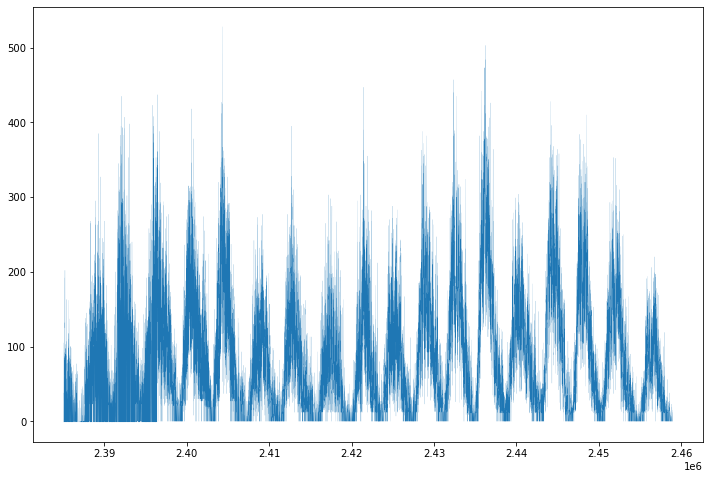

In [135]:
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(t.jd, silso_data[4], lw=0.1)

In [137]:
silso_stacked = np.hstack((t.jd[:, np.newaxis], silso_data.iloc[:,4:]))

header =  'Change date format to JD\n'
header += 'Julian_date SSN SSN_std observations Definitive_indicator'


np.savetxt('SILSO_daily_inJD.txt',silso_stacked, fmt='%1.1f', header=header)